![](https://live.staticflickr.com/65535/52502893372_aa829b571b_b_d.jpg)

# **Owerview**

## About the data: 
This dataset contains information about students exam performance depending on them gender, parent education level and etc.

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,- high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

## Usage
This dataset can be utilized for various tasks, including: 

* Exploratory Data Analysis (EDA): Explore distributions and relationships between features to gain insights into students exam performance.
* Predictive Modeling: Build machine learning models to predict students exam scores based on its features. This can involve regression algorithm.
* Feature Engineering: Create new features or handle missing values in the dataset to improve the performance of predictive models.
* Model Evaluation: Assess the performance of machine learning models in predicting students exam scores using appropriate evaluation metrics such as MAE, MSE, R2 Score, and Cross Validation Score.

# Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

# Import data.

In [2]:
df = pd.read_csv("/kaggle/input/student-study-performance/study_performance.csv")

# First look to data.

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
print("There are {} rows and {} columns in our dataset.".format(df.shape[0], df.shape[1]))

There are 1000 rows and 8 columns in our dataset.


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [7]:
print("Any null values in dataset:\n", df.isnull().sum())

Any null values in dataset:
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [8]:
print("Any duplicated values in dataset:\n", df.duplicated().sum())

Any duplicated values in dataset:
 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Look for categorical column`s values.

In [10]:
#Gender

df['gender'].unique().tolist()

['female', 'male']

In [11]:
#Race ethnicity

df['race_ethnicity'].unique().tolist()

['group B', 'group C', 'group A', 'group D', 'group E']

In [12]:
#Parent education level

df['parental_level_of_education'].unique().tolist()

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school',
 'some high school']

In [13]:
#Lunch before exam

df['lunch'].unique().tolist()

['standard', 'free/reduced']

In [14]:
#Test preparation course

df['test_preparation_course'].unique().tolist()

['none', 'completed']

# Data preprocessing.

## Adding total score and average score columns.

In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = round(df['total_score'] / 3, 2)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


## Change columns name.

In [16]:
df = df.rename(columns={'parental_level_of_education' : 'parent_education_level',
                       'test_preparation_course' : 'test_preparation'})
df.columns

Index(['gender', 'race_ethnicity', 'parent_education_level', 'lunch',
       'test_preparation', 'math_score', 'reading_score', 'writing_score',
       'total_score', 'average_score'],
      dtype='object')

## Change some values

In [17]:
df['parent_education_level'] = df['parent_education_level'].replace('some high school', 'high school')

df['parent_education_level'].value_counts()

parent_education_level
high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

# Data visualization

## Pie chart visualization for categorical columns.

In [18]:
categorical_cols = ['gender', 'race_ethnicity', 'parent_education_level', 'lunch', 'test_preparation']

for col in categorical_cols:
    value_counts = df[col].value_counts()
    
    fig = px.pie(df, values=value_counts.values, names=value_counts.index, title="{} Distribution.".format(col))
    fig.show()

## Countplots for test preparation and lunch before exam with genders.

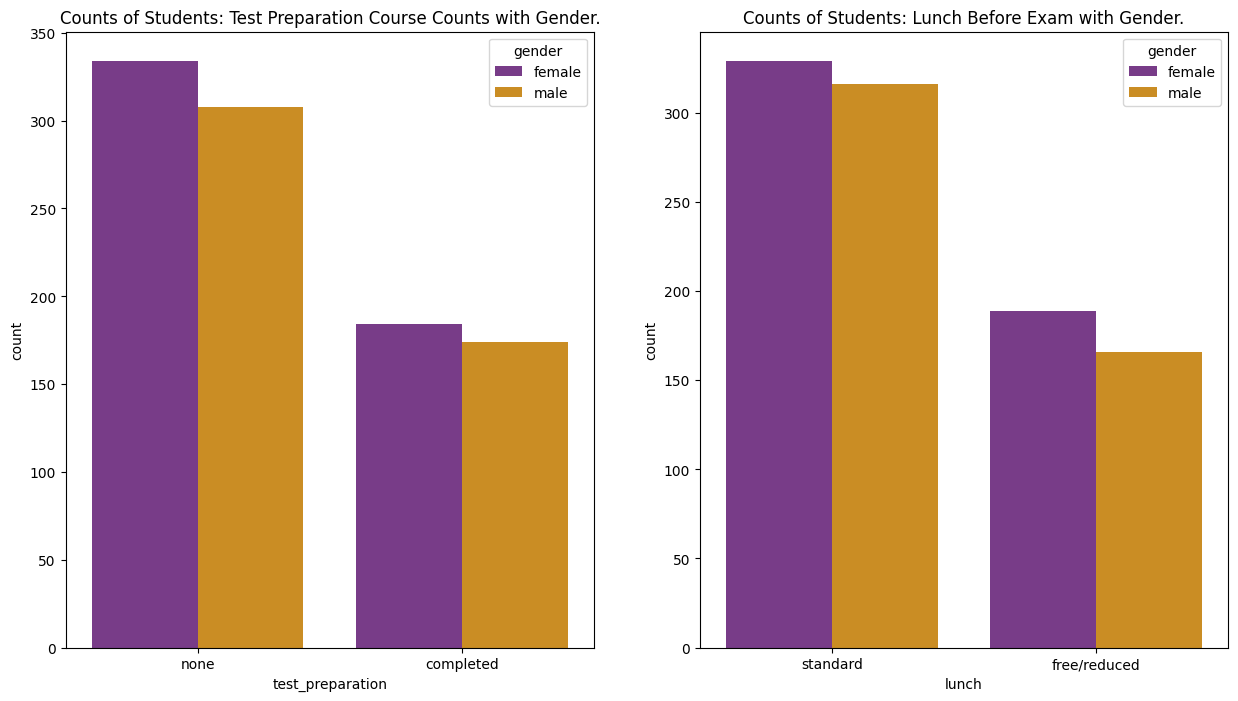

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

plt.subplot(121)
plt.title("Counts of Students: Test Preparation Course Counts with Gender.")
sns.countplot(df, x='test_preparation', hue='gender', palette='CMRmap')

plt.subplot(122)
plt.title("Counts of Students: Lunch Before Exam with Gender.")
sns.countplot(df, x='lunch', hue='gender', palette='CMRmap')

plt.show()

## Visualizing exam scores distribution: Math Score, Reading Score, Writing Score and Average Score.

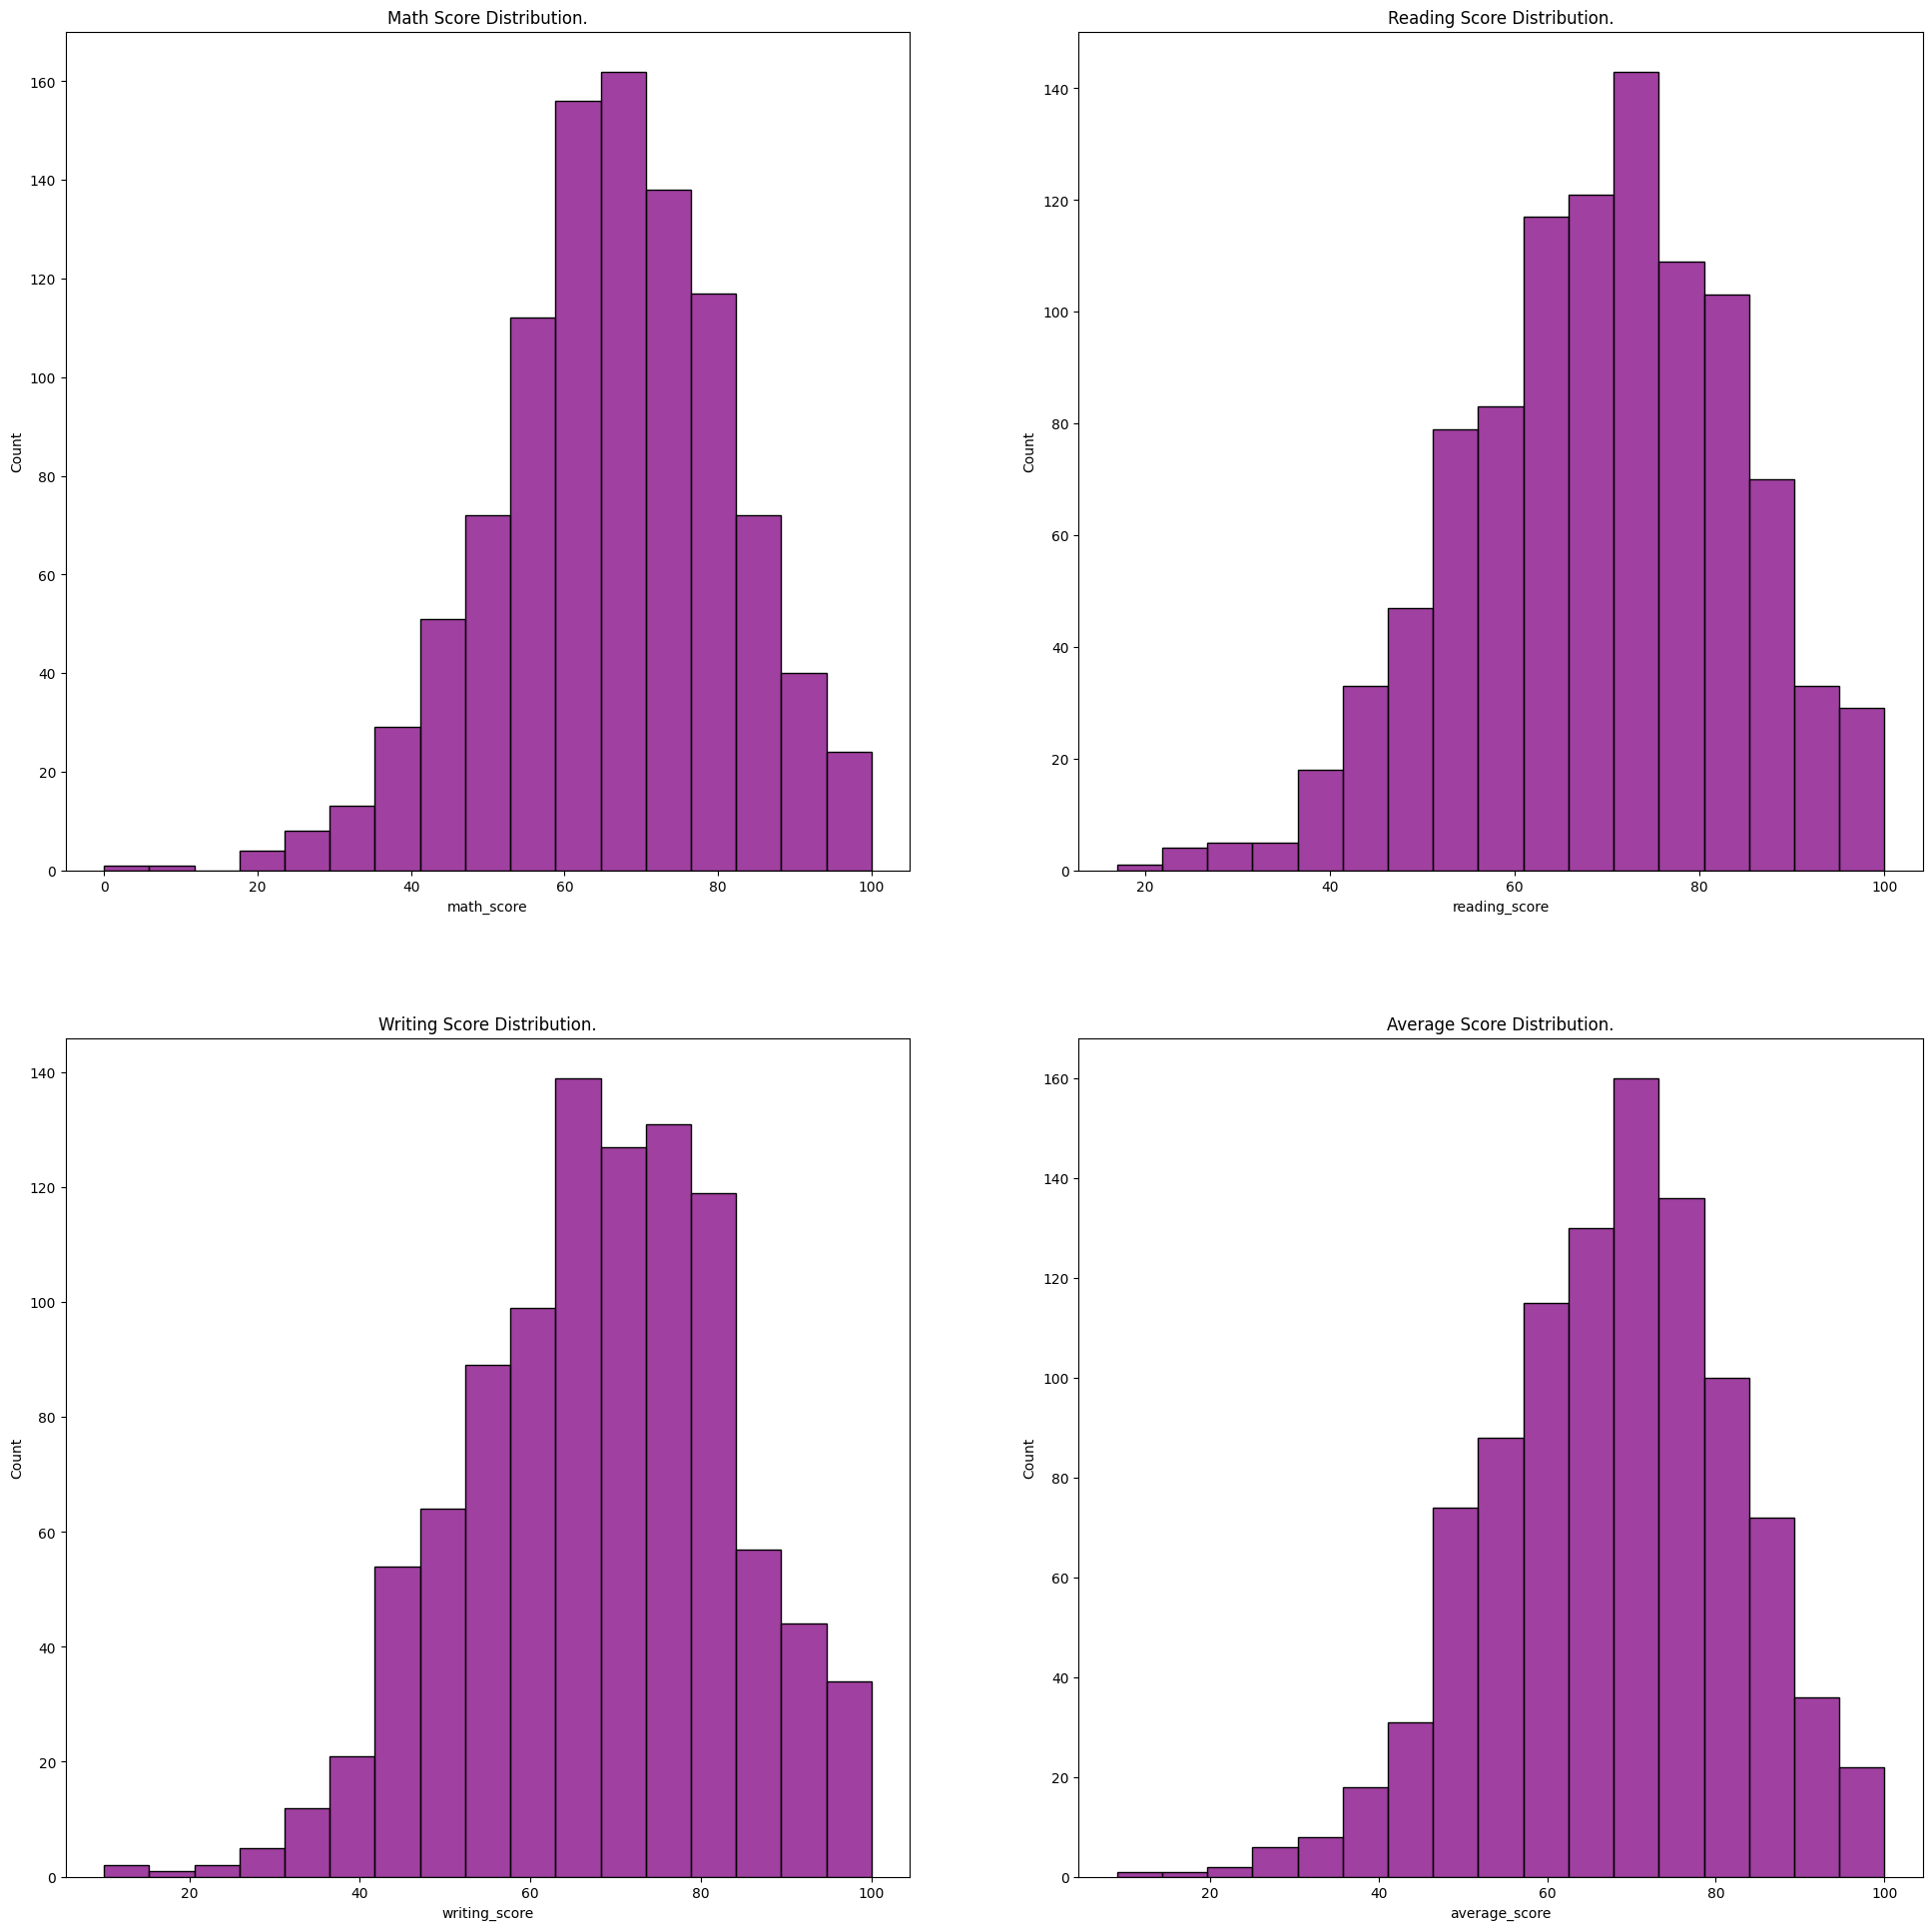

In [20]:
fig, axes = plt.subplots(2,2, figsize=(24,24))

sns.histplot(df, x='math_score', ax=axes[0,0], bins=17, color='purple')
axes[0,0].set_title("Math Score Distribution.")

sns.histplot(df, x='reading_score', ax=axes[0,1], bins=17, color='purple')
axes[0,1].set_title("Reading Score Distribution.")

sns.histplot(df, x='writing_score', ax=axes[1,0], bins=17, color='purple')
axes[1,0].set_title("Writing Score Distribution.")

sns.histplot(df, x='average_score', ax=axes[1,1], bins=17, color='purple')
axes[1,1].set_title("Average Score Distribution.")

fig.show()

## Visualizing exam scores distribution with gender.

Text(0.5, 1.0, 'Average Score Distribution with Gender')

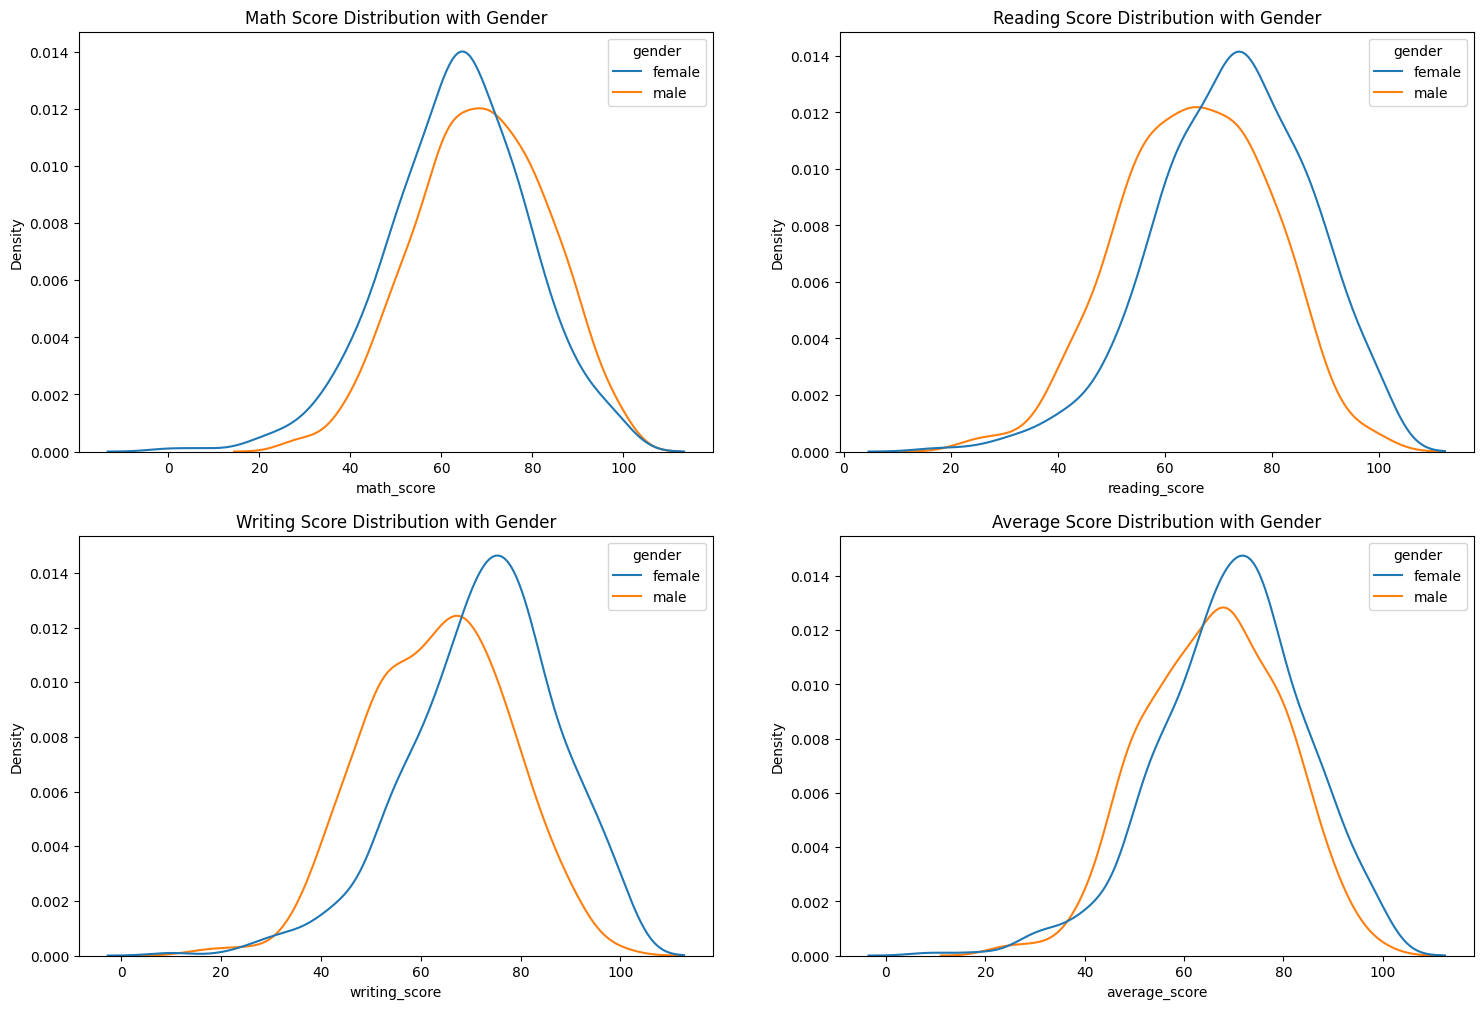

In [21]:
fig, axes = plt.subplots(2,2, figsize=(18,12))

sns.kdeplot(df, x='math_score', hue='gender', ax=axes[0,0])
axes[0,0].set_title("Math Score Distribution with Gender")

sns.kdeplot(df, x='reading_score', hue='gender', ax=axes[0,1])
axes[0,1].set_title("Reading Score Distribution with Gender")

sns.kdeplot(df, x='writing_score', hue='gender', ax=axes[1,0])
axes[1,0].set_title("Writing Score Distribution with Gender")

sns.kdeplot(df, x='average_score', hue='gender', ax=axes[1,1])
axes[1,1].set_title("Average Score Distribution with Gender")

## Visualizing exam scores distribution with race ethnicity.

Text(0.5, 1.0, 'Average Score Distribution with Race Ethnicity')

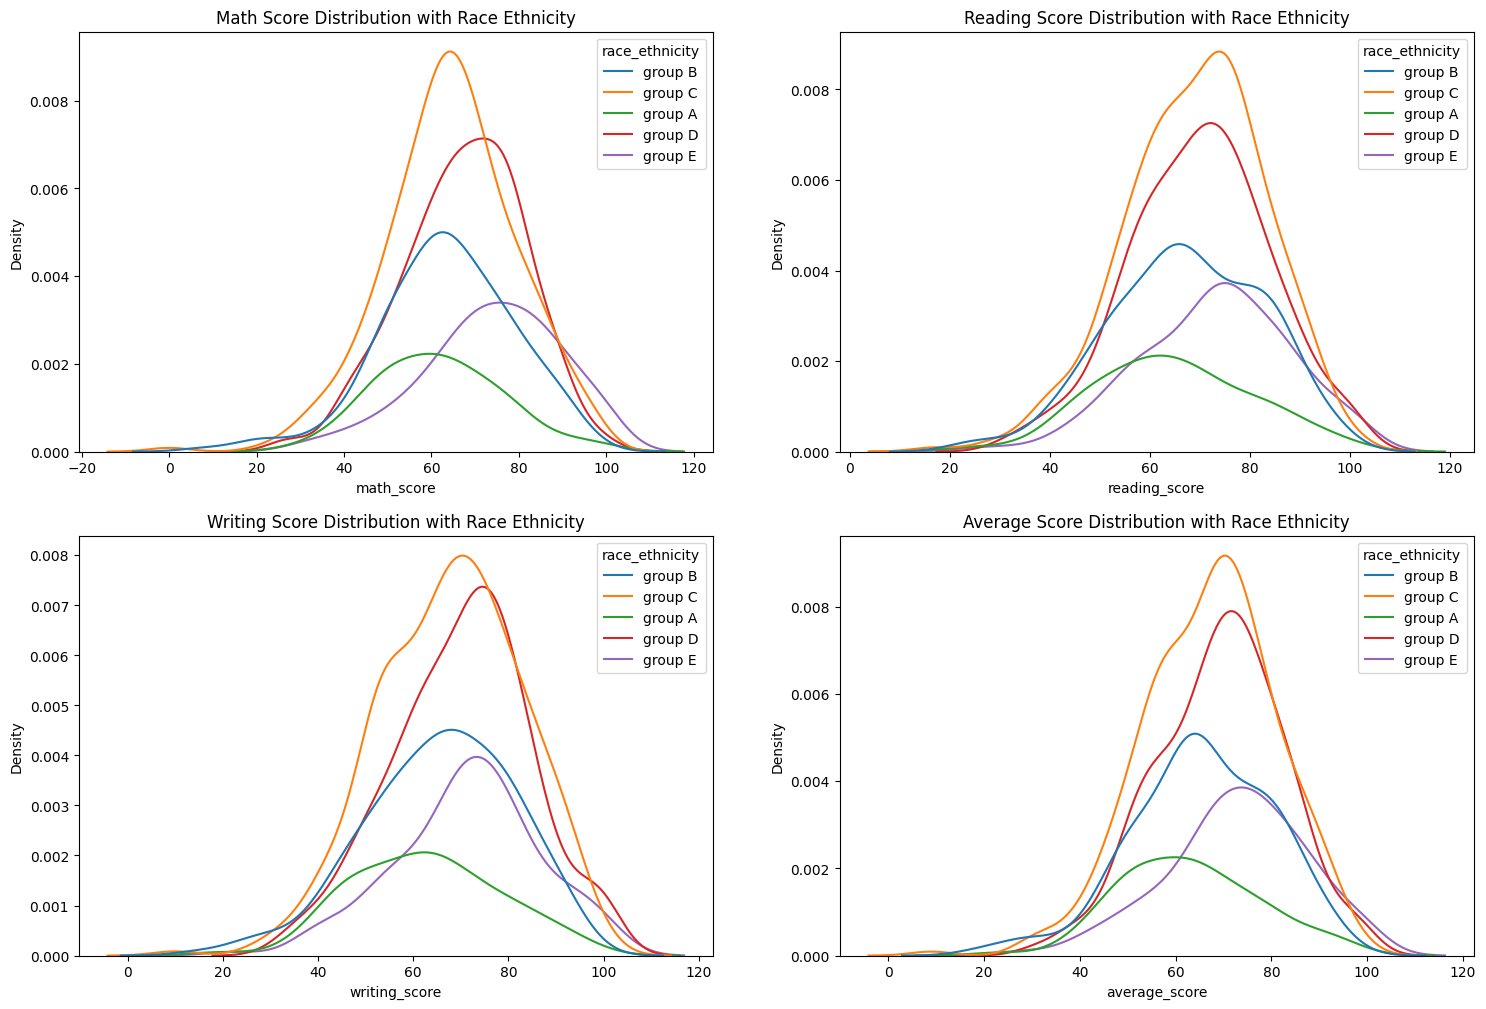

In [22]:
fig, axes = plt.subplots(2,2, figsize=(18,12))

sns.kdeplot(df, x='math_score', hue='race_ethnicity', ax=axes[0,0])
axes[0,0].set_title("Math Score Distribution with Race Ethnicity")

sns.kdeplot(df, x='reading_score', hue='race_ethnicity', ax=axes[0,1])
axes[0,1].set_title("Reading Score Distribution with Race Ethnicity")

sns.kdeplot(df, x='writing_score', hue='race_ethnicity', ax=axes[1,0])
axes[1,0].set_title("Writing Score Distribution with Race Ethnicity")

sns.kdeplot(df, x='average_score', hue='race_ethnicity', ax=axes[1,1])
axes[1,1].set_title("Average Score Distribution with Race Ethnicity")

## Visualizing exam scores distribution with parent education level.

Text(0.5, 1.0, 'Average Score Distribution with Parent Education Level')

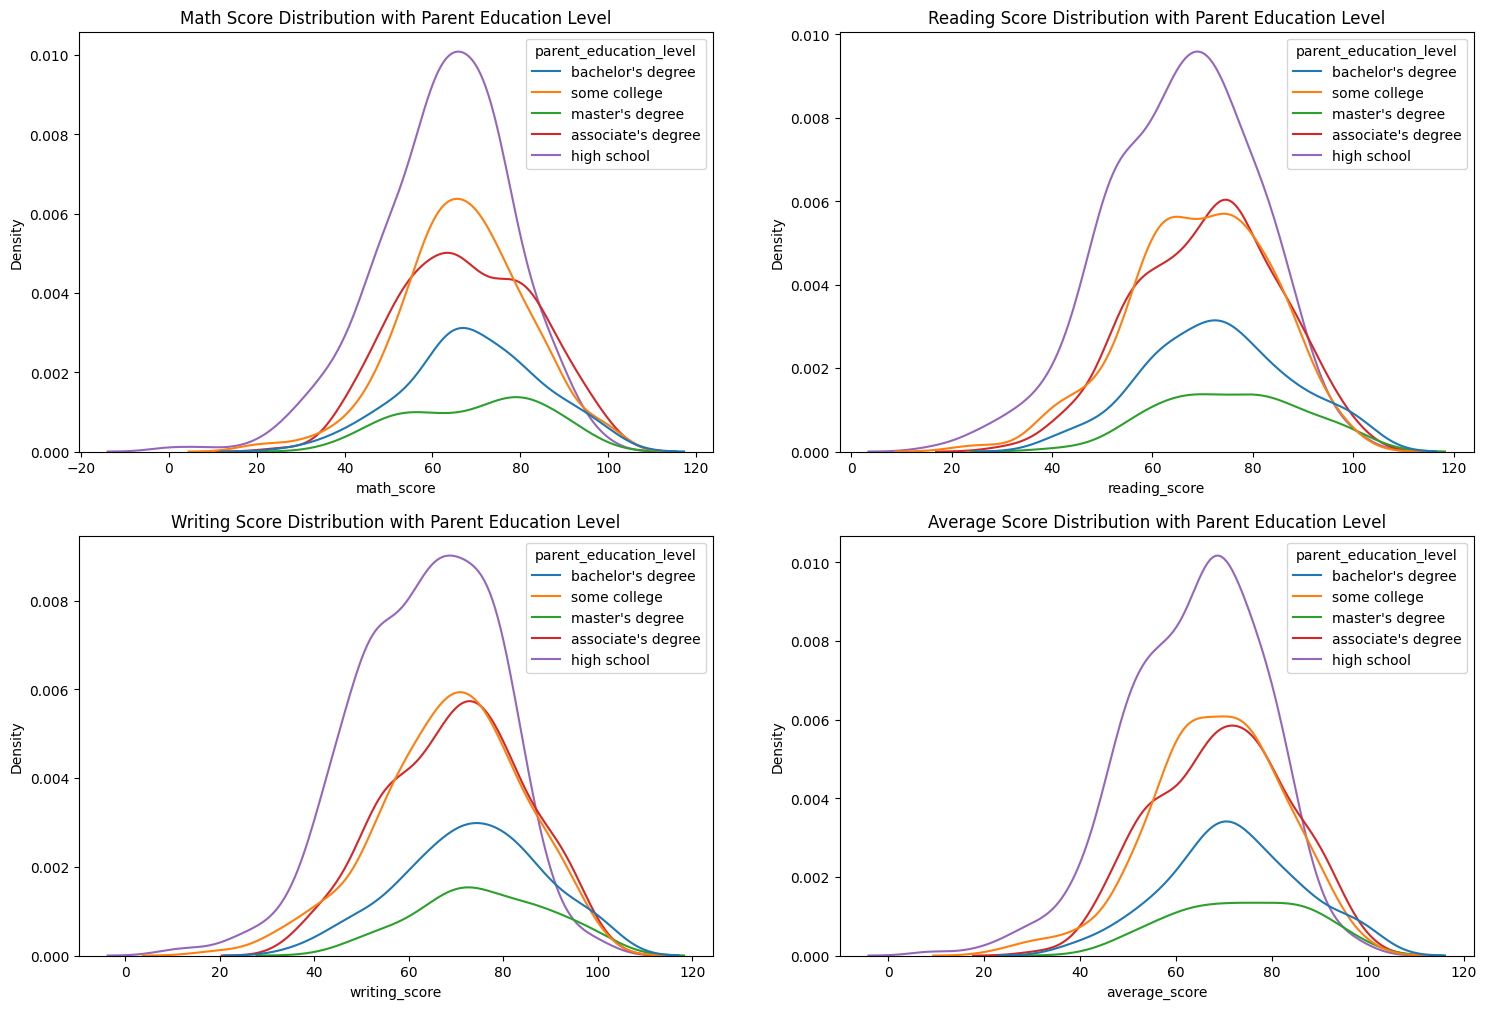

In [23]:
fig, axes = plt.subplots(2,2, figsize=(18,12))

sns.kdeplot(df, x='math_score', hue='parent_education_level', ax=axes[0,0])
axes[0,0].set_title("Math Score Distribution with Parent Education Level")

sns.kdeplot(df, x='reading_score', hue='parent_education_level', ax=axes[0,1])
axes[0,1].set_title("Reading Score Distribution with Parent Education Level")

sns.kdeplot(df, x='writing_score', hue='parent_education_level', ax=axes[1,0])
axes[1,0].set_title("Writing Score Distribution with Parent Education Level")

sns.kdeplot(df, x='average_score', hue='parent_education_level', ax=axes[1,1])
axes[1,1].set_title("Average Score Distribution with Parent Education Level")

## Visualizing exam scores distribution with lunch before exam.

Text(0.5, 1.0, 'Average Score Distribution with Lunch')

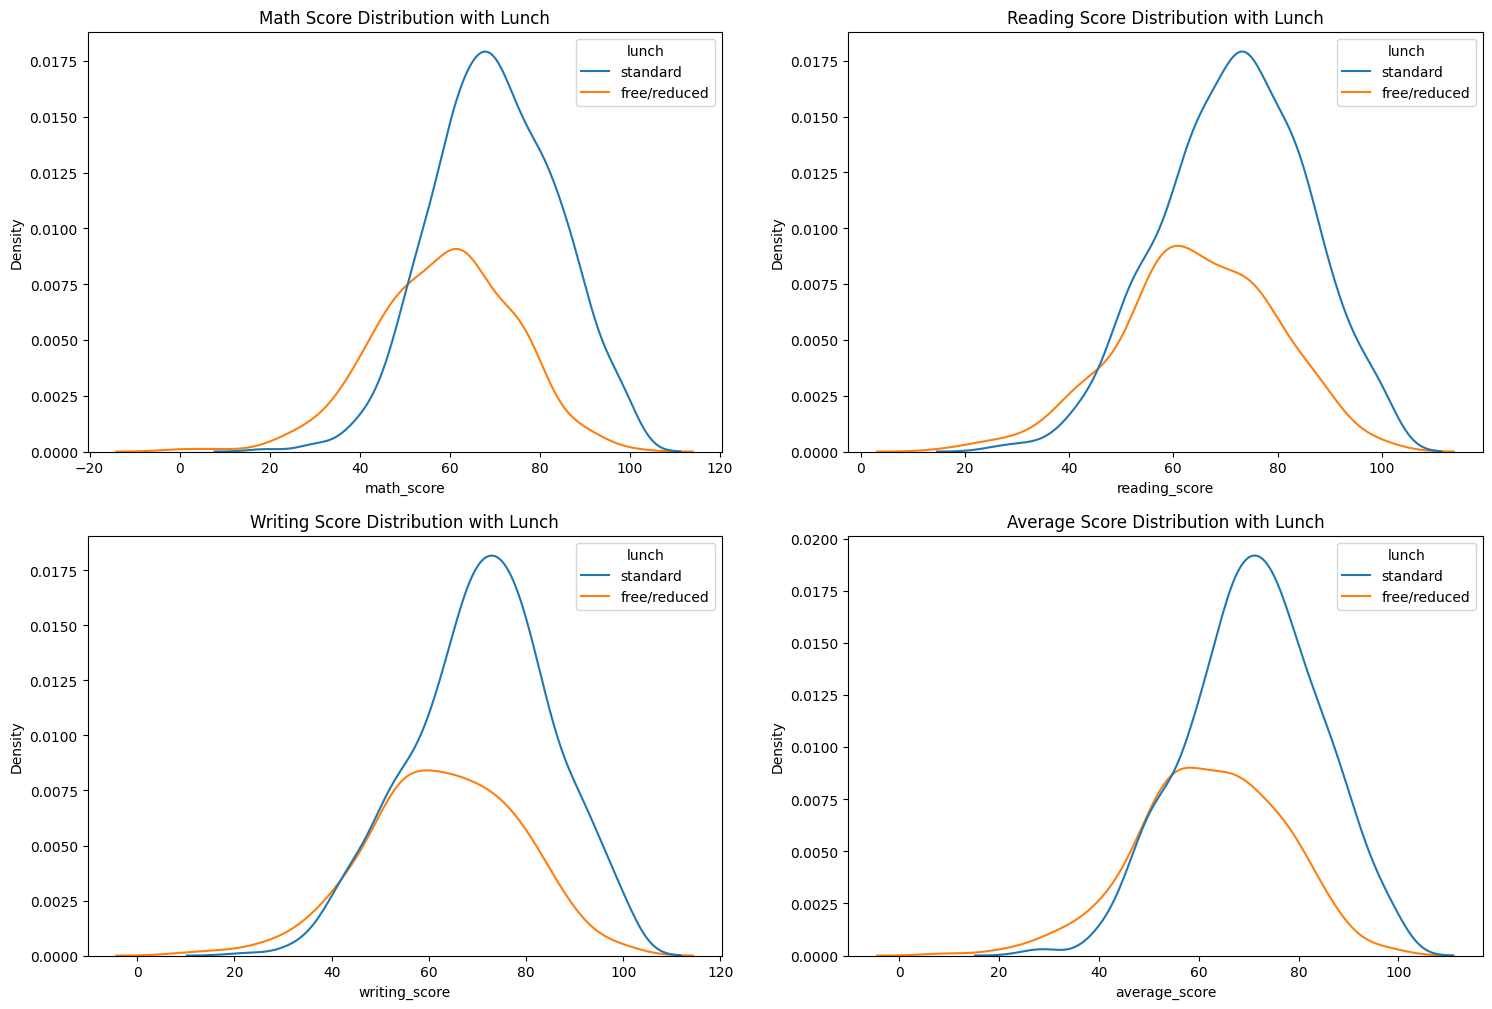

In [24]:
fig, axes = plt.subplots(2,2, figsize=(18,12))

sns.kdeplot(df, x='math_score', hue='lunch', ax=axes[0,0])
axes[0,0].set_title("Math Score Distribution with Lunch")

sns.kdeplot(df, x='reading_score', hue='lunch', ax=axes[0,1])
axes[0,1].set_title("Reading Score Distribution with Lunch")

sns.kdeplot(df, x='writing_score', hue='lunch', ax=axes[1,0])
axes[1,0].set_title("Writing Score Distribution with Lunch")

sns.kdeplot(df, x='average_score', hue='lunch', ax=axes[1,1])
axes[1,1].set_title("Average Score Distribution with Lunch")

## Visualizing exam scores distribution with test preparation before exam.

Text(0.5, 1.0, 'Average Score Distribution with Preparation before Exam')

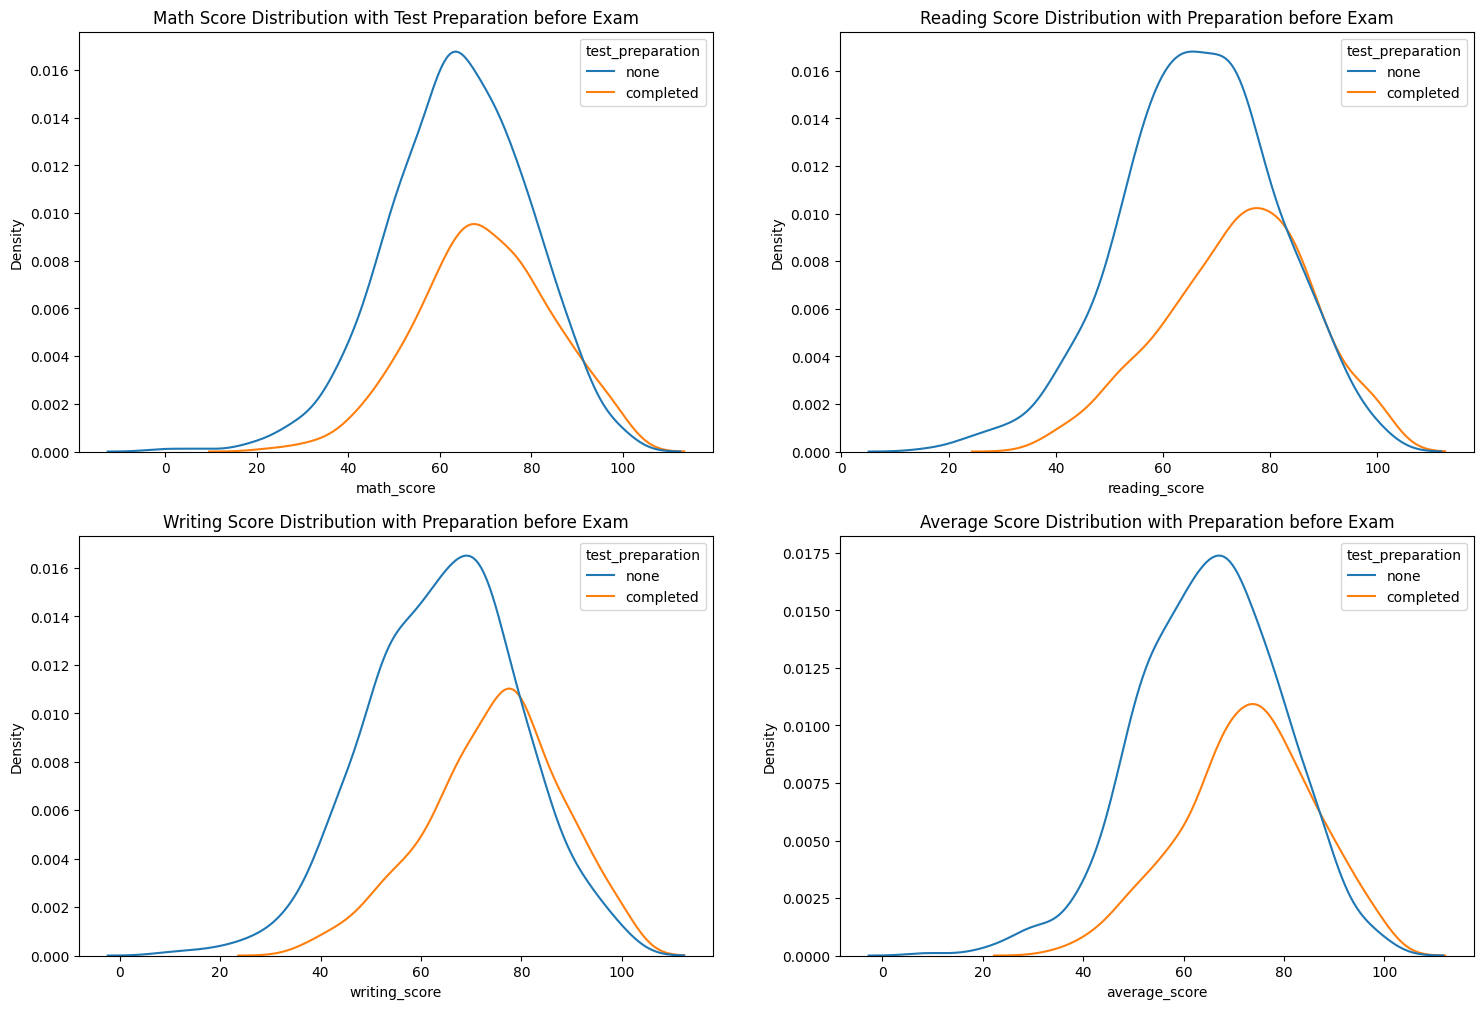

In [25]:
fig, axes = plt.subplots(2,2, figsize=(18,12))

sns.kdeplot(df, x='math_score', hue='test_preparation', ax=axes[0,0])
axes[0,0].set_title("Math Score Distribution with Test Preparation before Exam")

sns.kdeplot(df, x='reading_score', hue='test_preparation', ax=axes[0,1])
axes[0,1].set_title("Reading Score Distribution with Preparation before Exam")

sns.kdeplot(df, x='writing_score', hue='test_preparation', ax=axes[1,0])
axes[1,0].set_title("Writing Score Distribution with Preparation before Exam")

sns.kdeplot(df, x='average_score', hue='test_preparation', ax=axes[1,1])
axes[1,1].set_title("Average Score Distribution with Preparation before Exam")

## Visualizing exam scores using boxplot.

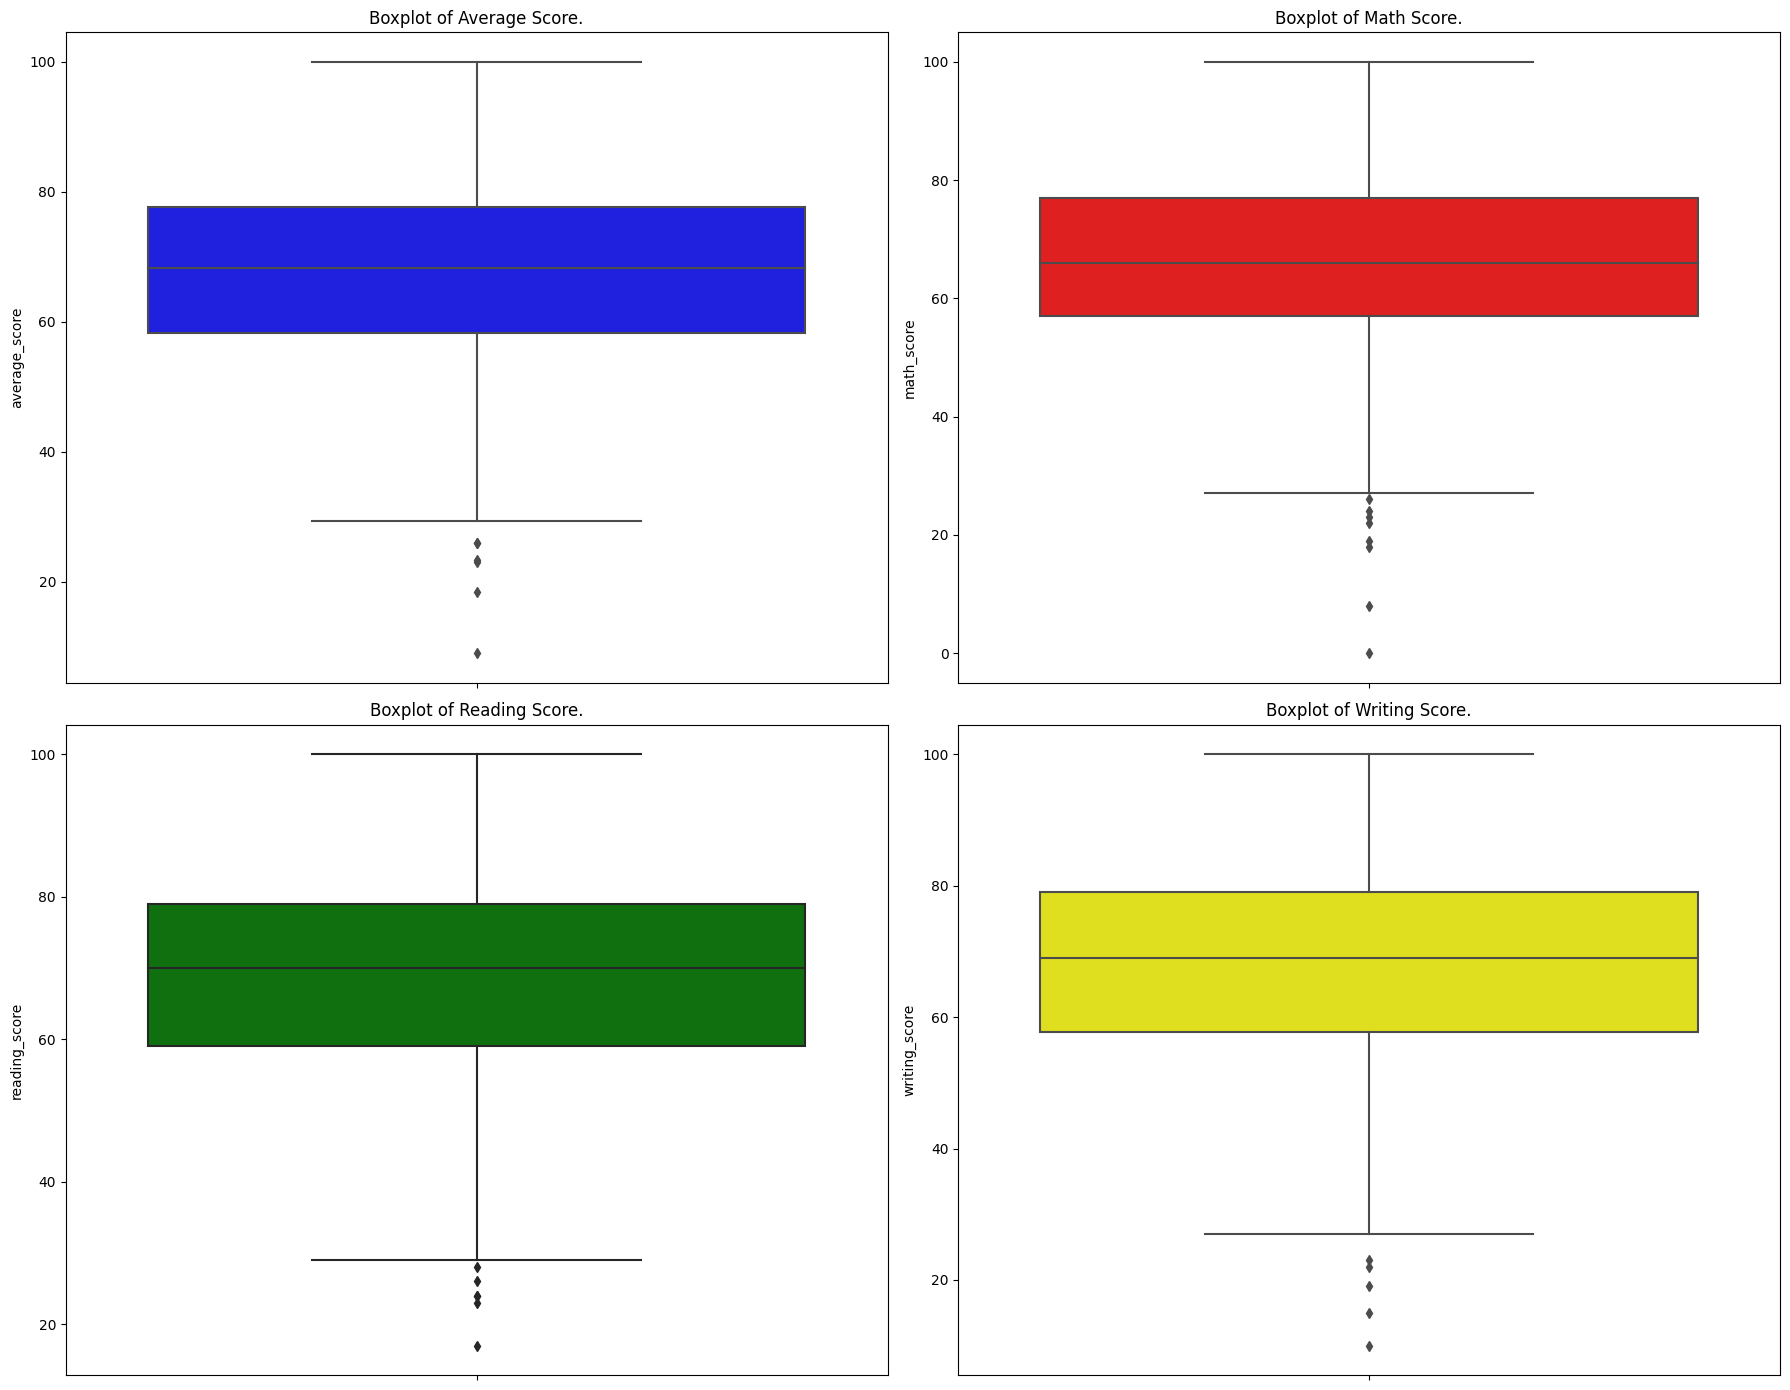

In [26]:
fig, axes = plt.subplots(2,2, figsize=(18,14))

sns.boxplot(data=df, y='average_score', ax=axes[0,0], color='blue')
axes[0,0].set_title("Boxplot of Average Score.")

sns.boxplot(data=df, y='math_score', ax=axes[0,1], color='red')
axes[0,1].set_title("Boxplot of Math Score.")

sns.boxplot(data=df, y='reading_score', ax=axes[1,0], color='green')
axes[1,0].set_title("Boxplot of Reading Score.")

sns.boxplot(data=df, y='writing_score', ax=axes[1,1], color='yellow')
axes[1,1].set_title("Boxplot of Writing Score.")

plt.tight_layout()
plt.show()

## Data preprocessing for correlation heatmap and model training.

In [27]:
categorical_columns = ['gender','race_ethnicity','parent_education_level','lunch','test_preparation']
numerical_columns = ['total_score', 'average_score', 'math_score', 'reading_score', 'writing_score']

def data_transformer(df):
    df['gender'] = df['gender'].map({'male': 1, 'female': 0})
    df['race_ethnicity'] = df['race_ethnicity'].map({'group A': 1,'group B': 2,'group C': 3,'group D': 4,'group E': 5})
    df['parent_education_level'] = df['parent_education_level'].map({'high school': 1,'some college': 2, "bachelor's degree": 3, "master's degree": 4, "associate's degree": 5})
    df['lunch'] = df['lunch'].map({'standard':1, 'free/reduced': 0})
    df['test_preparation'] = df['test_preparation'].map({'none':0 , 'completed':1})

    return df

data_transformer(df)
df.head()

,gender,race_ethnicity,parent_education_level,lunch,test_preparation,math_score,reading_score,writing_score,total_score,average_score
0,0,2,3,1,0,72,72,74,218,72.67
1,0,3,2,1,1,69,90,88,247,82.33
2,0,2,4,1,0,90,95,93,278,92.67
3,1,1,5,0,0,47,57,44,148,49.33
4,1,3,2,1,0,76,78,75,229,76.33


## Correlation and Correlation Heatmap.

In [28]:
df2 = df.copy()

df2.corr()

,gender,race_ethnicity,parent_education_level,lunch,test_preparation,math_score,reading_score,writing_score,total_score,average_score
gender,1.000000,-0.001502,-0.031987,0.021372,0.006028,0.167982,-0.244313,-0.301225,-0.130861,-0.130868
race_ethnicity,-0.001502,1.000000,0.085798,0.046563,0.017508,0.216415,0.145253,0.165691,0.185168,0.185165
parent_education_level,-0.031987,0.085798,1.000000,-0.006563,0.013773,0.137196,0.158942,0.185975,0.168964,0.168964
lunch,0.021372,0.046563,-0.006563,1.000000,-0.017044,0.350877,0.229560,0.245769,0.290064,0.290064
test_preparation,0.006028,0.017508,0.013773,-0.017044,1.000000,0.177702,0.241780,0.312946,0.256710,0.256715
math_score,0.167982,0.216415,0.137196,0.350877,0.177702,1.000000,0.817580,0.802642,0.918746,0.918744
reading_score,-0.244313,0.145253,0.158942,0.229560,0.241780,0.817580,1.000000,0.954598,0.970331,0.970331
writing_score,-0.301225,0.165691,0.185975,0.245769,0.312946,0.802642,0.954598,1.000000,0.965667,0.965669
total_score,-0.130861,0.185168,0.168964,0.290064,0.256710,0.918746,0.970331,0.965667,1.000000,1.000000
average_score,-0.130868,0.185165,0.168964,0.290064,0.256715,0.918744,0.970331,0.965669,1.000000,1.000000


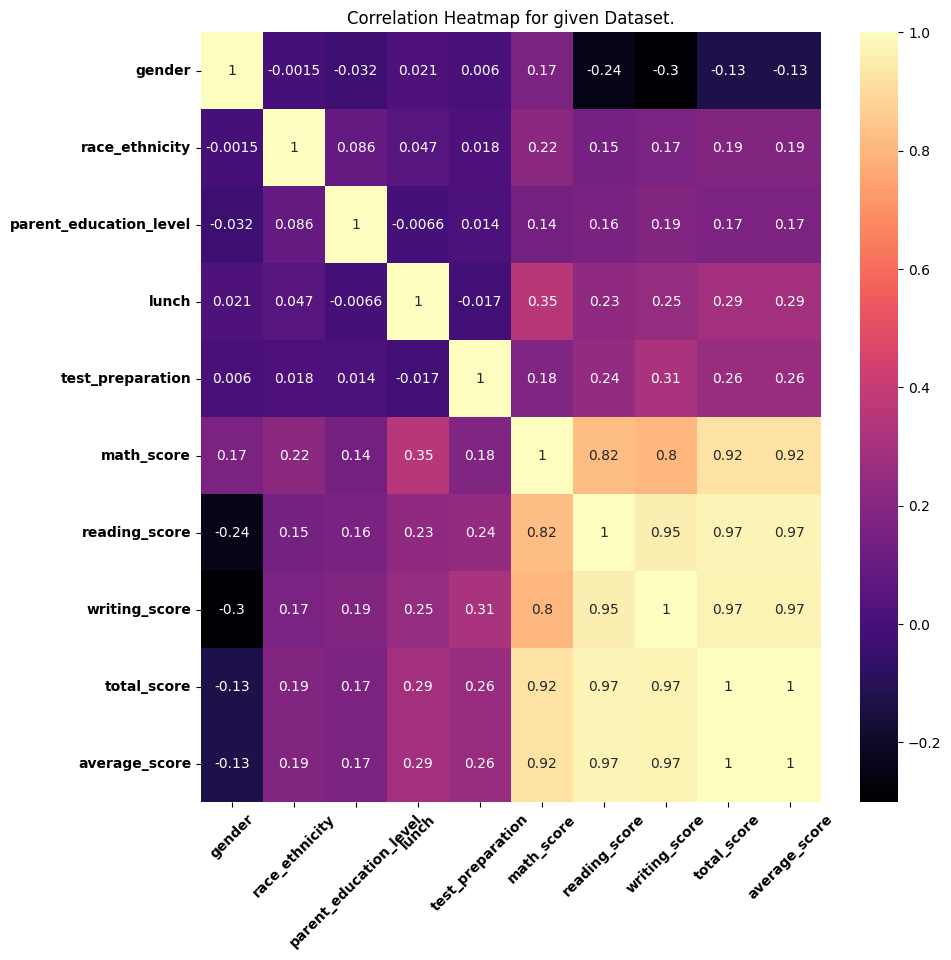

In [29]:
fig = plt.figure(figsize=(10,10))

sns.heatmap(data=df2.corr(), cmap='magma', annot=True)

plt.xticks(fontsize=10, weight='bold', rotation=45)
plt.yticks(fontsize=10, weight='bold')
plt.title("Correlation Heatmap for given Dataset.")

plt.show()

## Split dataset for modelling: Math Score.

In [30]:
X_math = df.drop(columns=['math_score', 'total_score', 'average_score'], axis=1)
y_math = df['math_score']

X_math_train, X_math_test, y_math_train, y_math_test = train_test_split(X_math, y_math, test_size=0.2, random_state=51)

X_math_train.shape, X_math_test.shape, y_math_train.shape, y_math_test.shape

((800, 7), (200, 7), (800,), (200,))

## Creating function for calculating model performance.

In [31]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, r2

#Cross validation score.
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


# Training linear models: Linear Regression, Ridge Regression and Lasso Regression for Math Score.

## Linear Regression Model training.

In [32]:
linear_model_math = LinearRegression()

linear_model_math.fit(X_math_train, y_math_train)
linear_model_math_predict = linear_model_math.predict(X_math_test)

mae, mse, r2 = evaluate_model(y_math_test, linear_model_math_predict)

scores = cross_val_score(linear_model_math, X_math, y_math, scoring='neg_mean_squared_error', cv=10)

linear_model_math_scores = np.sqrt(-scores)

display_scores(linear_model_math_scores)

print("Mean Absolute Error for Linear Regression Model is: {}".format(mae))
print("Mean Squarred Error for Linear Regression Model is: {}".format(mse))
print("R2 Score for Linear Regression Model is: {}\n".format(r2))

display_scores(linear_model_math_scores)

Scores: [5.16300491 5.85259796 5.67978717 5.30928594 5.29172982 6.25775269
 5.1034565  5.37047969 6.08889933 5.33549373]
Mean: 5.545248773373
Standard deviation: 0.38099401213132833
Mean Absolute Error for Linear Regression Model is: 4.548779374830485
Mean Squarred Error for Linear Regression Model is: 29.51040633044465
R2 Score for Linear Regression Model is: 0.8684327187387073

Scores: [5.16300491 5.85259796 5.67978717 5.30928594 5.29172982 6.25775269
 5.1034565  5.37047969 6.08889933 5.33549373]
Mean: 5.545248773373
Standard deviation: 0.38099401213132833


## Ridge Regression Model training.

In [33]:
ridge_model_math = Ridge(alpha=1)
ridge_model_math.fit(X_math_train, y_math_train)

ridge_model_math_pred = ridge_model_math.predict(X_math_test)

mae, mse, r2 = evaluate_model(y_math_test, ridge_model_math_pred)

score_ridge_math = cross_val_score(ridge_model_math, X_math, y_math, scoring='neg_mean_squared_error', cv=10)
ridge_model_math_scores = np.sqrt(-score_ridge_math)

print("Mean Absolute Error for Ridge Regression Model is: {}".format(mae))
print("Mean Squarred Error for Ridge Regression Model is: {}".format(mse))
print("R2 Score for Ridge Regression Model is: {}\n".format(r2))

display_scores(ridge_model_math_scores)

Mean Absolute Error for Ridge Regression Model is: 4.548065448791286
Mean Squarred Error for Ridge Regression Model is: 29.493202585965154
R2 Score for Ridge Regression Model is: 0.8685094187970981

Scores: [5.15878555 5.85071643 5.68216493 5.30981585 5.29331878 6.26018088
 5.10496626 5.36726748 6.09087701 5.33451038]
Mean: 5.545260353919554
Standard deviation: 0.3819793875357191


## Lasso Regression Model training.

In [34]:
lasso_model_math = Lasso(alpha=1)
lasso_model_math.fit(X_math_train, y_math_train)

lasso_model_math_pred = lasso_model_math.predict(X_math_test)

mae, mse, r2 = evaluate_model(y_math_test, lasso_model_math_pred)

score_lasso_math = cross_val_score(lasso_model_math, X_math, y_math, scoring='neg_mean_squared_error', cv=10)
lasso_model_math_scores = np.sqrt(-score_lasso_math)

print("Mean Absolute Error for Lasso Regression Model is: {}".format(mae))
print("Mean Squarred Error for Lasso Regression Model is: {}".format(mse))
print("R2 Score for Lasso Regression Model is: {}\n".format(r2))

display_scores(lasso_model_math_scores)

Mean Absolute Error for Lasso Regression Model is: 4.9270713608880214
Mean Squarred Error for Lasso Regression Model is: 37.7698260075806
R2 Score for Lasso Regression Model is: 0.8316094578337658

Scores: [5.4513998  6.63387586 6.59986645 6.29274156 6.32428643 7.1120489
 6.03421241 6.15255904 7.00465411 6.29614841]
Mean: 6.3901792975864575
Standard deviation: 0.4570768296987644


## Ridge Model Evaluating.

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()

ridge_math_grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_math_grid_search.fit(X_math, y_math)

print("Best hyperparameters for Ridge Regression:", ridge_math_grid_search.best_params_)

Best hyperparameters for Ridge Regression: {'alpha': 0.1}


In [36]:
best_ridge_math = Ridge(alpha=0.1)

best_ridge_math.fit(X_math_train, y_math_train)
best_ridge_pred = best_ridge_math.predict(X_math_test)

mae, mse, r2 = evaluate_model(y_math_test, best_ridge_pred)

score_best_ridge = cross_val_score(best_ridge_math, X_math, y_math, scoring='neg_mean_squared_error', cv=10)
best_ridge_math_scores = np.sqrt(-score_best_ridge)

print("Mean Absolute Error for Best Ridge Regression Model is: {}".format(mae))
print("Mean Squarred Error for Best Ridge Regression Model is: {}".format(mse))
print("R2 Score for Best Ridge Regression Model is: {}\n".format(r2))

display_scores(best_ridge_math_scores)

Mean Absolute Error for Best Ridge Regression Model is: 4.548707468846184
Mean Squarred Error for Best Ridge Regression Model is: 29.5085615977218
R2 Score for Best Ridge Regression Model is: 0.8684409431754122

Scores: [5.16257247 5.85240026 5.68001863 5.3093288  5.29188092 6.25798933
 5.10359786 5.37014528 6.08909018 5.33538319]
Mean: 5.545240692069022
Standard deviation: 0.38109349362012


## Split dataset for modelling: Reading Score.

In [37]:
X_reading = df.drop(columns=['reading_score', 'average_score', 'total_score'], axis=1)
y_reading = df['reading_score']

X_reading_train, X_reading_test, y_reading_train, y_reading_test = train_test_split(X_reading, y_reading, test_size=0.2, random_state=51)
X_reading_train.shape, X_reading_test.shape, y_reading_train.shape, y_reading_test.shape

((800, 7), (200, 7), (800,), (200,))

# Training linear models: Linear Regression, Ridge Regression and Lasso Regression for Reading Score.

## Linear Regression Model training.

In [38]:
linear_reading_model = LinearRegression()

linear_reading_model.fit(X_reading_train, y_reading_train)
linear_reading_model_pred = linear_reading_model.predict(X_reading_test)

mae, mse, r2 = evaluate_model(y_reading_test, linear_reading_model_pred)

score_linear_reading = cross_val_score(linear_reading_model, X_reading, y_reading, scoring='neg_mean_squared_error', cv=10)
linear_reading_model_scores = np.sqrt(-score_linear_reading)

print("Mean Absolute Error for Linear Regression Model is: {}".format(mae))
print("Mean Squarred Error for Linear Regression Model is: {}".format(mse))
print("R2 Score for Linear Regression Model is: {}\n".format(r2))

display_scores(linear_reading_model_scores)

Mean Absolute Error for Linear Regression Model is: 3.1291127485035566
Mean Squarred Error for Linear Regression Model is: 15.122695213367814
R2 Score for Linear Regression Model is: 0.9346768686494256

Scores: [4.14330408 4.09019234 4.17072469 3.94961207 4.36133056 3.56026333
 4.07679824 3.62543416 4.35900618 4.22815821]
Mean: 4.05648238531972
Standard deviation: 0.26067628144843485


## Ridge Regression Model training.

In [39]:
ridge_reading_model = Ridge(alpha=1)

ridge_reading_model.fit(X_reading_train, y_reading_train)
ridge_reading_model_pred = ridge_reading_model.predict(X_reading_test)

mae, mse, r2 = evaluate_model(y_reading_test, ridge_reading_model_pred)

score_ridge_reading = cross_val_score(ridge_reading_model, X_reading, y_reading, scoring='neg_mean_squared_error', cv=10)
ridge_reading_model_scores = np.sqrt(-score_ridge_reading)

print("Mean Absolute Error for Ridge Regression Model is: {}".format(mae))
print("Mean Squarred Error for Ridge Regression Model is: {}".format(mse))
print("R2 Score for Ridge Regression Model is: {}\n".format(r2))

display_scores(ridge_reading_model_scores)

Mean Absolute Error for Ridge Regression Model is: 3.1288947517510506
Mean Squarred Error for Ridge Regression Model is: 15.123159549385003
R2 Score for Ridge Regression Model is: 0.9346748629300604

Scores: [4.1427766  4.08958506 4.17094588 3.94997782 4.36197458 3.56018337
 4.07681585 3.62558093 4.35846275 4.22798553]
Mean: 4.056428835940077
Standard deviation: 0.2606378214328954


## Split dataset for modelling: Writing Score.

In [40]:
X_writing = df.drop(columns=['writing_score', 'total_score', 'average_score'], axis=1)
y_writing = df['writing_score']

X_writing_train, X_writing_test, y_writing_train, y_writing_test = train_test_split(X_writing, y_writing, test_size=0.2, random_state=51)

X_writing_train.shape, X_writing_test.shape, y_writing_train.shape, y_writing_test.shape

((800, 7), (200, 7), (800,), (200,))

# Training linear models: Linear Regression, Ridge Regression and Lasso Regression for Writing Score.

## Linear Regression Model training.

In [41]:
linear_writing_model = LinearRegression()

linear_writing_model.fit(X_writing_train, y_writing_train)
linear_writing_model_pred = linear_writing_model.predict(X_writing_test)

mae, mse, r2 = evaluate_model(y_writing_test, linear_writing_model_pred)

linear_writing_scores = cross_val_score(linear_writing_model, X_writing, y_writing, scoring='neg_mean_squared_error', cv=10)
linear_writing_model_scores = np.sqrt(-linear_writing_scores)


print("Mean Absolute Error for Linear Regression Model is: {}".format(mae))
print("Mean Squarred Error for Linear Regression Model is: {}".format(mse))
print("R2 Score for Linear Regression Model is: {}\n".format(r2))

display_scores(linear_writing_model_scores)

Mean Absolute Error for Linear Regression Model is: 2.890215464658975
Mean Squarred Error for Linear Regression Model is: 12.894499643558317
R2 Score for Linear Regression Model is: 0.9484811399252465

Scores: [3.66223057 3.70510503 3.72682604 3.98691489 3.71614553 3.44099614
 3.66101912 3.25743288 4.24007019 3.80153118]
Mean: 3.7198271580073348
Standard deviation: 0.2544158887672208


## Ridge Regression Model training.

In [42]:
ridge_writing_model = Ridge(alpha=1)

ridge_writing_model.fit(X_writing_train, y_writing_train)
ridge_writing_model_pred = ridge_writing_model.predict(X_writing_test)

mae, mse, r2 = evaluate_model(y_writing_test, ridge_writing_model_pred)

ridge_writing_score = cross_val_score(ridge_writing_model, X_writing, y_writing, scoring='neg_mean_squared_error', cv=10)
ridge_writing_model_scores = np.sqrt(-ridge_writing_score)

print("Mean Absolute Error for Ridge Regression Model is: {}".format(mae))
print("Mean Squarred Error for Ridge Regression Model is: {}".format(mse))
print("R2 Score for Ridge Regression Model is: {}\n".format(r2))

display_scores(ridge_writing_model_scores)

Mean Absolute Error for Ridge Regression Model is: 2.8892243178244748
Mean Squarred Error for Ridge Regression Model is: 12.894857799081574
R2 Score for Ridge Regression Model is: 0.9484797089457748

Scores: [3.66281424 3.70276136 3.7305098  3.98721463 3.71975729 3.43738485
 3.66296961 3.25413798 4.24105755 3.798949  ]
Mean: 3.719755632701608
Standard deviation: 0.2555320119512241


# Preparation for Model Deployment.

## Math Score Model preparation for deployment.

In [43]:
import pickle

math_model_filename = "math_model.sav"
pickle.dump(best_ridge_math, open(math_model_filename, 'wb'))

## Reading Score Model preparation for deployment.

In [44]:
reading_model_filename = "reading_mode.sav"
pickle.dump(linear_reading_model, open(reading_model_filename, 'wb'))

## Writing Score Model preparation for deployment.

In [45]:
writing_model_filename = 'writing_model.sav'
pickle.dump(linear_writing_model, open(writing_model_filename, 'wb'))

**If you like my notebook, pls upvote!**
**You can follow me on Linkedln:** [Linekdln](https://www.linkedin.com/in/javidan-ganbarov/)